<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Desafio_4_Regress%C3%A3o_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: variavel de upload
from google.colab import files
arquivo_upload = files.upload()


Saving MKT.csv to MKT.csv


#**Análise Descritiva**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# carregando o arquivo do upload em um dataframe

data = pd.read_csv('/content/MKT.csv',index_col=None)


In [5]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [6]:
# Verificando a estrutura dos dados e a presença de valores ausentes
data_info = data.info()
data_missing_values = data.isnull().sum()

data_info, data_missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


(None,
 youtube      0
 facebook     0
 newspaper    0
 sales        0
 dtype: int64)

In [7]:
# verificando dados estatísticos
data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


#**Análise Exploratória**

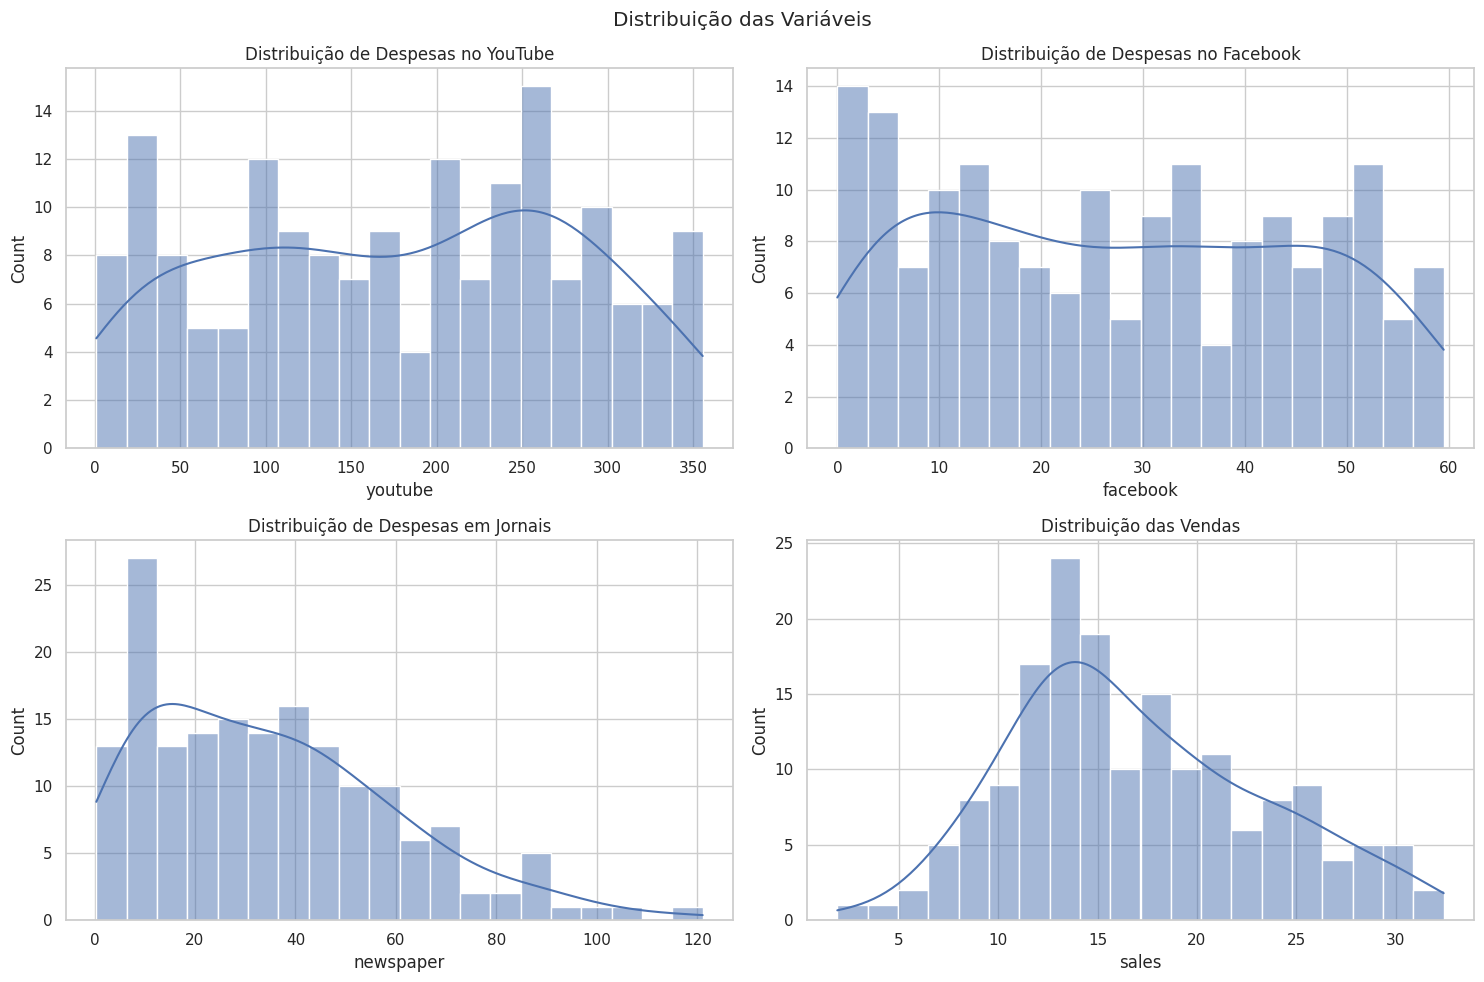

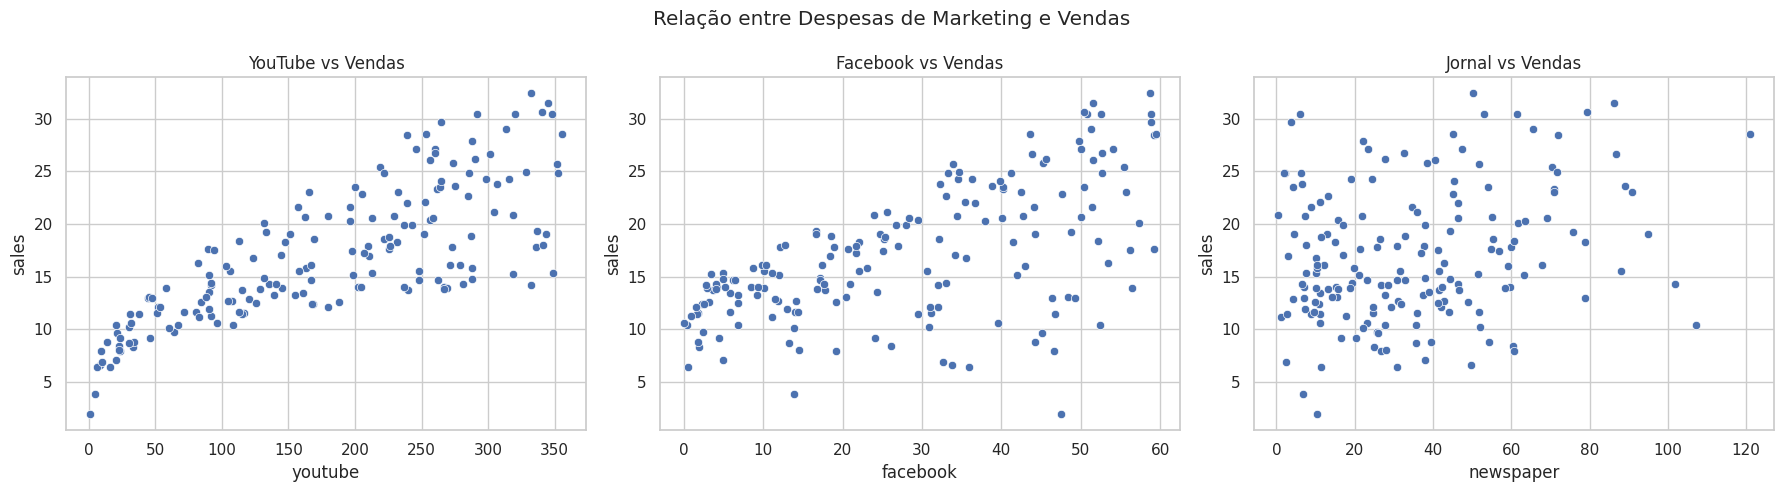

In [8]:
sns.set(style="whitegrid")

# Criando histogramas para cada variável
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis')

sns.histplot(data['youtube'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Despesas no YouTube')

sns.histplot(data['facebook'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Despesas no Facebook')

sns.histplot(data['newspaper'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Despesas em Jornais')

sns.histplot(data['sales'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição das Vendas')

plt.tight_layout()
plt.show()

# Criando gráficos de dispersão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relação entre Despesas de Marketing e Vendas')

sns.scatterplot(data=data, x='youtube', y='sales', ax=axes[0])
axes[0].set_title('YouTube vs Vendas')

sns.scatterplot(data=data, x='facebook', y='sales', ax=axes[1])
axes[1].set_title('Facebook vs Vendas')

sns.scatterplot(data=data, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Jornal vs Vendas')

plt.tight_layout()
plt.show()


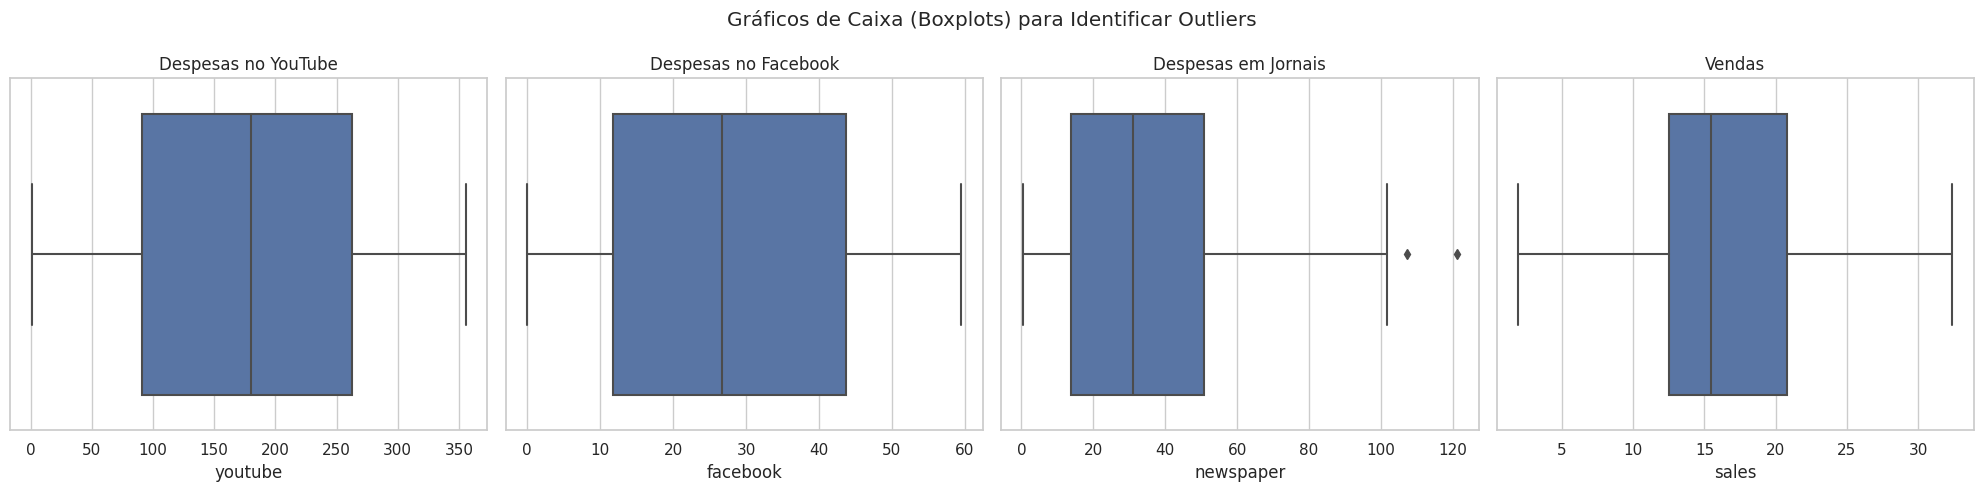

In [9]:
# Criando gráficos de caixa (boxplots) para cada variável do dataset para identificar outliers
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Gráficos de Caixa (Boxplots) para Identificar Outliers')

sns.boxplot(x=data['youtube'], ax=axes[0])
axes[0].set_title('Despesas no YouTube')

sns.boxplot(x=data['facebook'], ax=axes[1])
axes[1].set_title('Despesas no Facebook')

sns.boxplot(x=data['newspaper'], ax=axes[2])
axes[2].set_title('Despesas em Jornais')

sns.boxplot(x=data['sales'], ax=axes[3])
axes[3].set_title('Vendas')

plt.tight_layout()
plt.show()


Com os gráficos acima, busquei entender as relações entre as variáveis e a sua distribuição. Alem de possibilitar a correlação entre as váriáveis, eles mostram no histogram se há outliers alem da forma de sua distribuição.
###Distribuição

A distribuição das despesas no YouTube é aproximadamente uniforme. No Facebook, a distribuição é levemente inclinada à direita. As despesas em jornais também têm uma inclinação à direita, sugerindo que são geralmente baixas. As vendas seguem um padrão semelhante, com uma distribuição inclinada à direita, indicando uma concentração em valores menores.

###Relação entre as variaveis

Há uma tendência positiva entre despesas no YouTube e aumento de vendas. Similarmente, as despesas no Facebook mostram uma relação positiva com as vendas. Por outro lado, a correlação entre despesas em jornais e vendas é menos evidente do que nos casos de YouTube e Facebook.
No Boxplot apresenta normalidade com relação aos valores, no entanto há presença de outliers nas despesas com jornas, os mesmo não serão tratados pois não trazem prejuizos evidentes na análise que estou desenvolvendo.

#**Modelagem**

In [10]:
# Preparando os dados
X = data[['youtube', 'facebook', 'newspaper']]  # Variáveis independentes
y = data['sales']                              # Variável dependente

# Dividindo o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

#**Calculando Predição**

In [11]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coeficientes do modelo
coefficients = model.coef_

print('MSE: ', mse)
print('R2: ', r2)
print('COEFICIENTS: ', coefficients )




MSE:  5.576790234026713
R2:  0.872863085701216
COEFICIENTS:  [ 4.41858407e-02  1.94481975e-01 -4.88341093e-05]


O R2 indica que o modelo está bem ajustado porém o MSE está moderado consuderando os valores gerais das vendas, mas indica que o modelo ainda pode ser melhorado. Os coeficientes do youtube, facebook e jornais, estão mostrando o impacto do investimento em cada plataforma. Pelos números, cada dólar investido no facebook da mnaior retorno, em seguida vem o youtube. Em jornais o impacto é negativo, o que posso inferir que investimento em jornais não traz bons retornos.

In [12]:
# Coletando algumas previsões para apresentação
n = data['sales'].count()
predictions_sales = pd.DataFrame({
    'youtube': X_test['youtube'],
    'facebook': X_test['facebook'],
    'newspaper': X_test['newspaper'],
    'predicted_sales': y_pred
}).head(n)

In [13]:
# Cria coluna sales_real para efeito de comparação entre o valor predito e o valor real

predictions_sales['sales_real'] = y_test
predictions_sales


,youtube,facebook,newspaper,predicted_sales,sales_real
101,0.84,47.52,10.44,12.981440,1.92
55,256.20,51.60,40.56,25.056751,26.04
56,231.84,22.08,78.84,18.237407,18.24
139,258.48,28.32,69.12,20.628560,20.52
157,167.40,2.52,31.92,11.588295,12.36
78,108.48,0.36,27.84,8.564984,10.44
135,140.64,17.64,6.48,13.347692,14.28
104,263.76,40.20,54.12,23.173040,23.52
109,51.60,31.08,24.60,12.026338,11.52
108,328.44,34.68,71.64,24.956584,24.96


#**Resultado**

A análise revela uma relação positiva entre os investimentos em publicidade no YouTube e Facebook e o aumento das vendas, como pode ser visto nos gráficos de dispersão, sugerindo maior eficácia destes canais em comparação aos jornais para prospecção de leads. Com base na observação deste aspecto, aconselho alocar mais recursos para o YouTube e Facebook, dada sua maior influência nas vendas. Os coeficientes do modelo de regressão linear mostram que o investimento no YouTube pode ser mais rentável do que no Facebook. O modelo pode prever vendas futuras, auxiliando no planejamento e otimização de gastos em marketing. Seria estrategicamente aconselhável, que a empresa revise a distribuição do orçamento de marketing, priorizando canais com maior retorno e faça ajustes na estratégia adtada até aqui.